# Análisis de distribuciones de modelos

1. Topico por evaluador
2. Evaluadores por topicos
3. Distribución de pesos enTFIDF
4. Numero de features en tfidf

In [94]:
import pandas as pd

import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
a4_dims = (13.7, 2.27)
from joblib import load, dump

In [9]:
dataframe_values = joblib.load('../../trained_models/archivos/topicos_por_evaluador.pkl')
dataframe_values.head(2)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
CVU,,,,,,,,,,,,,,,,,,,,,
32,1.039730e-11,0.022571,0.024007,0.000000e+00,3.344736e-13,0.594679,0.045747,0.007538,0.000234,0.082395,...,0.003466,0.000000e+00,0.015221,6.372822e-11,0.101933,0.000000,0.535655,0.0,0.000000e+00,0.000000
62,3.316664e-06,0.033592,0.075867,2.268785e-15,1.231933e-13,0.000021,0.070647,0.035292,0.009585,0.009715,...,0.015404,1.614905e-14,0.013444,2.346778e-11,0.025559,0.037891,0.036762,0.0,5.257031e-18,0.055865


## Groupy de los pesos por evaluador

promedia el vector de cada texto evaluado por un evaluador

In [11]:
topics_evaluador = dataframe_values.groupby(["CVU"])[dataframe_values.columns.tolist()[3:]].mean().reset_index()
topics_evaluador.head()

,CVU,3,4,5,6,7,8,9,10,11,...,490,491,492,493,494,495,496,497,498,499
0,32,0.000000e+00,3.344736e-13,5.946791e-01,0.045747,0.007538,0.000234,0.082395,4.328023e-09,3.125335e-14,...,0.003466,0.000000e+00,0.015221,6.372822e-11,0.101933,0.000000,5.356554e-01,0.000000,0.000000e+00,0.000000e+00
1,62,2.268785e-15,1.231933e-13,2.130934e-05,0.070647,0.035292,0.009585,0.009715,1.149325e-01,5.326042e-02,...,0.015404,1.614905e-14,0.013444,2.346778e-11,0.025559,0.037891,3.676195e-02,0.000000,5.257031e-18,5.586499e-02
2,69,3.138819e-02,3.081193e-03,3.188412e-02,0.085819,0.042314,0.031455,0.046093,3.342529e-02,3.125957e-02,...,0.069906,6.562758e-02,0.102238,6.494592e-02,0.098280,0.045843,6.188742e-02,0.033367,9.932581e-02,6.823725e-01
3,92,0.000000e+00,7.967706e-17,1.572656e-08,0.037290,0.011857,0.045701,0.028163,8.771782e-10,5.310148e-04,...,0.031606,2.439729e-14,0.004882,0.000000e+00,0.020260,0.011168,1.085635e-01,0.000000,1.736001e-17,3.050502e-12
4,112,1.300955e-01,1.485544e-13,2.569760e-05,0.067111,0.008156,0.015631,0.015414,0.000000e+00,5.814963e-04,...,0.044469,4.672058e-14,0.024951,2.828788e-11,0.009978,0.119817,2.977220e-08,0.000000,2.744523e-01,3.340501e-12


funcion para filtrar la pertenencia según umbral

In [12]:
def topicos(x):
    if x > thresh:
        return 1
    else: 
        return 0

# Sin normalizar
### para un evaluador, ver cuantos topicos tiene con un thresh dado:

In [13]:
pd_umbral = pd.DataFrame(columns=["sum","umbral"])

In [14]:
orden_rows = []
for thresh in range(1,5,1):
    thresh = thresh/10
    topicos_thresh_1 = topics_evaluador.iloc[:,2:].applymap(topicos).sum(axis=1)
    topicos_thresh_1 = topicos_thresh_1.to_frame()
    topicos_thresh_1.rename({0:"sum"},axis=1,inplace=True)
    topicos_thresh_1["umbral"] = "umbral=" + str(thresh)
    orden_rows.append(topicos_thresh_1)
    pd_umbral = pd_umbral.append(topicos_thresh_1)

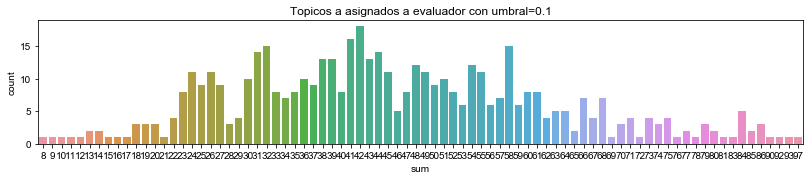

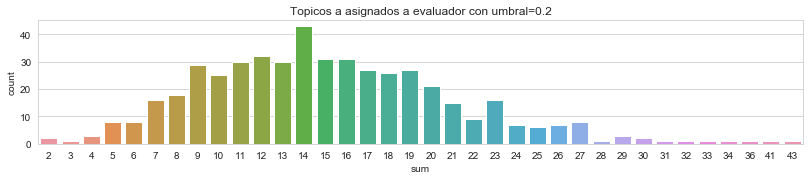

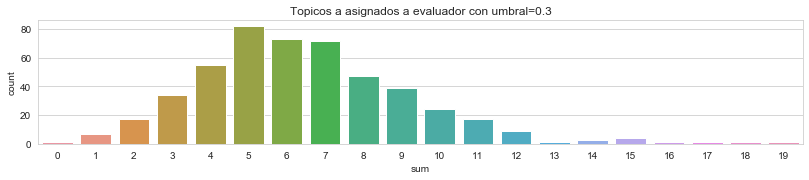

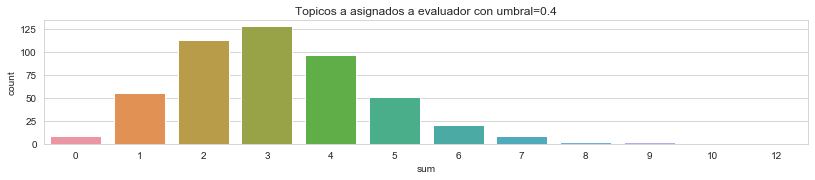

In [15]:
for file in range(4):
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax = sns.countplot(orden_rows[file]["sum"])
    sns.set_style("whitegrid")
    ax.set_title('Topicos a asignados a evaluador con ' + orden_rows[file]["umbral"][0] )
    plt.show()

### Para un tópico cuantos evaluadores tiene asignados? 

In [16]:
pd_umbral = pd.DataFrame(columns=["sum","umbral"])

In [17]:
orden_rows = []
for thresh in range(2,12,1):
    thresh = thresh/10
    topicos_thresh_1 = topics_evaluador.iloc[:,2:].applymap(topicos).sum(axis=0)
    topicos_thresh_1 = topicos_thresh_1.to_frame()
    topicos_thresh_1.rename({0:"sum"},axis=1,inplace=True)
    topicos_thresh_1["umbral"] = "umbral=" + str(thresh)
    
    orden_rows.append(topicos_thresh_1)
    pd_umbral = pd_umbral.append(topicos_thresh_1)

In [39]:
orden_rows[file].reset_index()["umbral"][0]

'umbral=0.2'

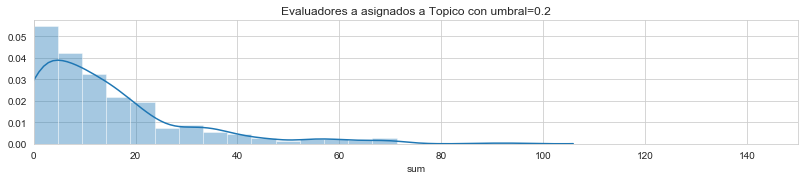

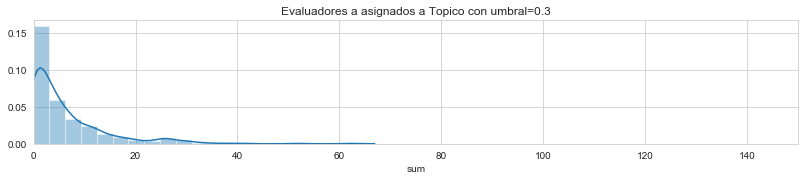

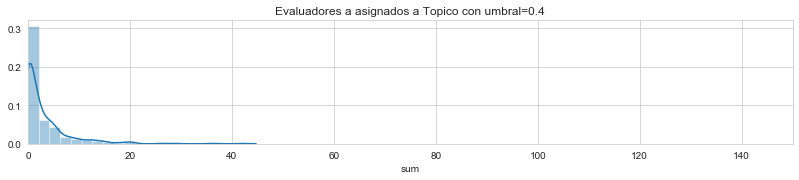

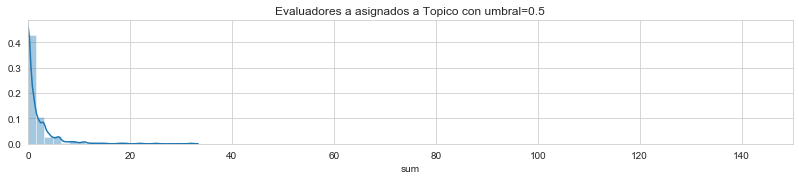

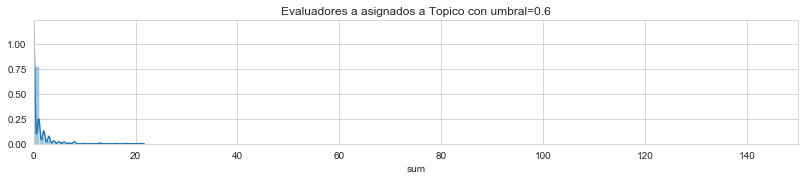

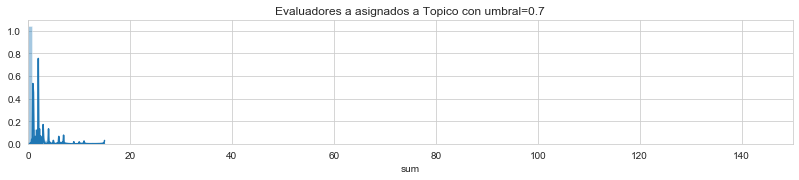

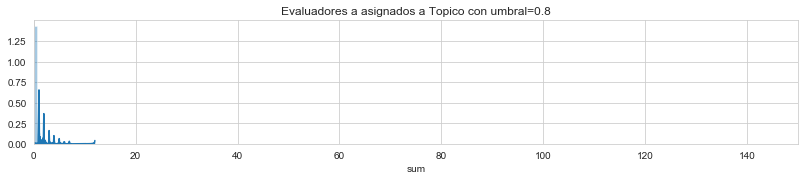

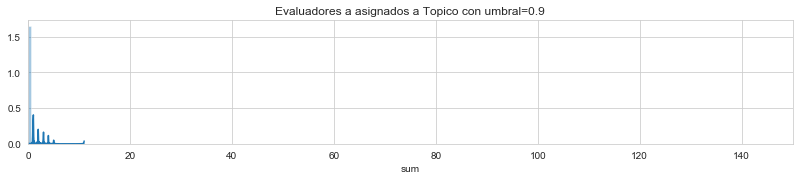

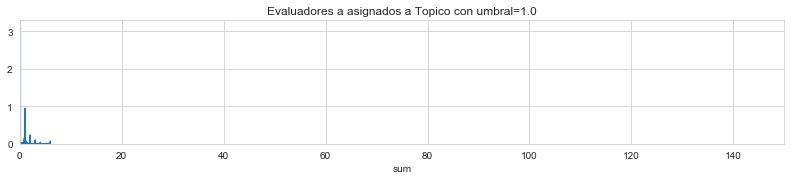

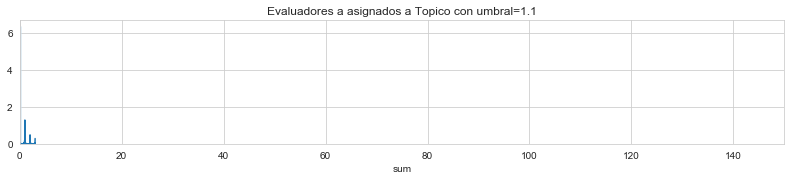

In [40]:
for file in range(len(orden_rows)):
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax = sns.distplot(orden_rows[file]["sum"],bins=20)
    sns.set_style("whitegrid")
    ax.set_title('Evaluadores a asignados a Topico con ' + orden_rows[file].reset_index()["umbral"][0])
    ax.set_xlim(0,150)
    plt.show()

# Normalizar Dataset

In [41]:
topics_evaluador["max"] = topics_evaluador.iloc[:,1:].max(axis=1)
topics_evaluador = topics_evaluador.iloc[:,1:-1].div(topics_evaluador["max"], axis=0)


### para un evaluador, ver cuantos topicos tiene con un thres dado:

In [42]:
orden_rows = []
for thresh in range(1,10,1):
    thresh = thresh/10
    topicos_thresh_1 = topics_evaluador.iloc[:,1:].applymap(topicos).sum(axis=1)
    topicos_thresh_1 = topicos_thresh_1.to_frame()
    topicos_thresh_1.rename({0:"sum"},axis=1,inplace=True)
    topicos_thresh_1["umbral"] = "umbral=" + str(thresh)
    orden_rows.append(topicos_thresh_1)
    pd_umbral = pd_umbral.append(topicos_thresh_1)

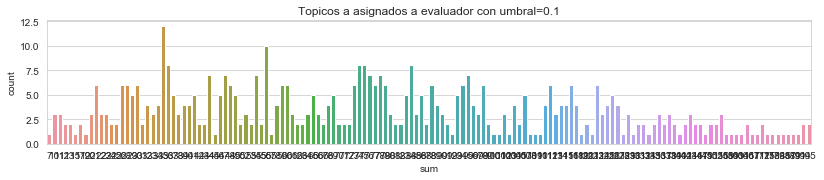

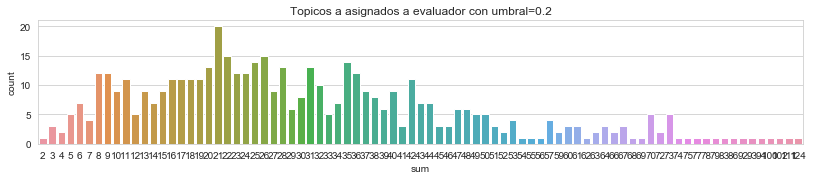

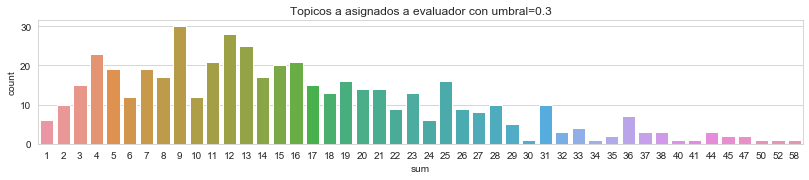

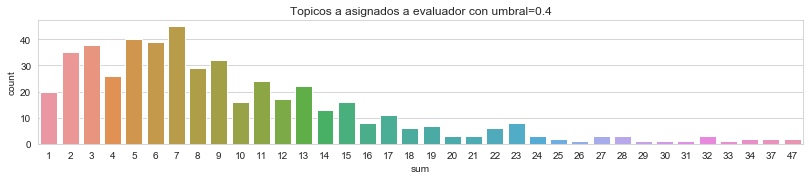

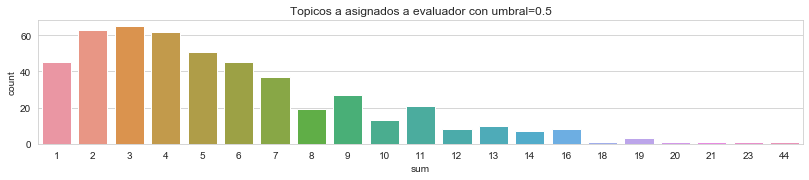

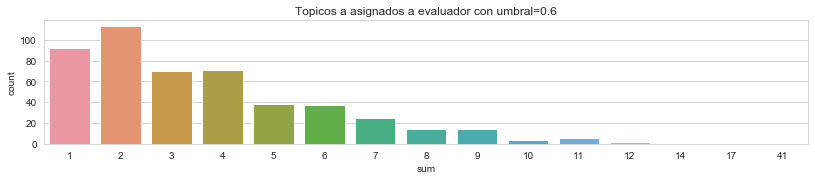

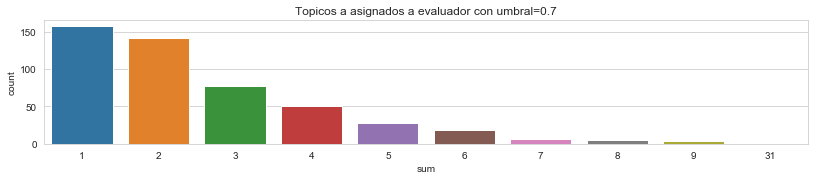

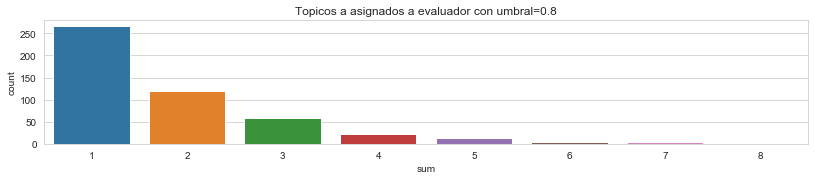

In [43]:
for file in range(8):
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax = sns.countplot(orden_rows[file]["sum"])
    sns.set_style("whitegrid")
    ax.set_title('Topicos a asignados a evaluador con ' + orden_rows[file]["umbral"][0] )
    plt.show()

### Para un tópico cuantos evaluadores tiene asignados? 

In [44]:
orden_rows = []
for thresh in range(1,12,1):
    thresh = thresh/10
    topicos_thresh_1 = topics_evaluador.iloc[:,1:].applymap(topicos).sum(axis=0)
    topicos_thresh_1 = topicos_thresh_1.to_frame()
    topicos_thresh_1.rename({0:"sum"},axis=1,inplace=True)
    topicos_thresh_1["umbral"] = "umbral=" + str(thresh)
    
    orden_rows.append(topicos_thresh_1)
    pd_umbral = pd_umbral.append(topicos_thresh_1)

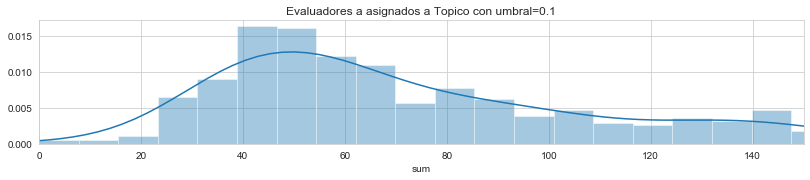

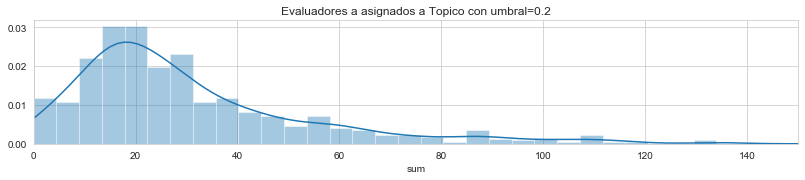

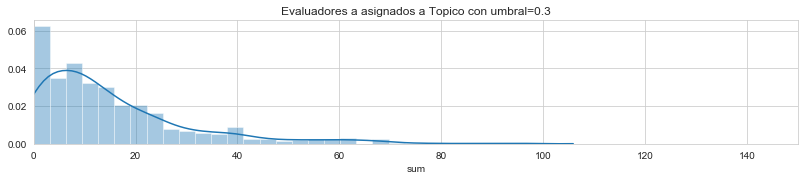

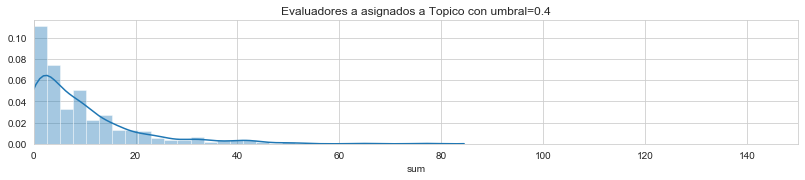

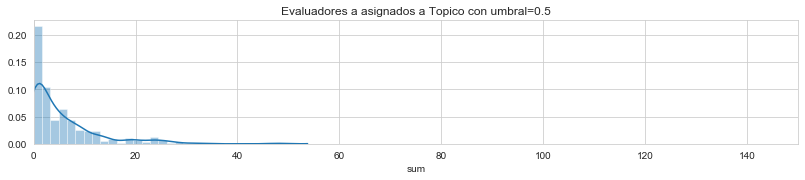

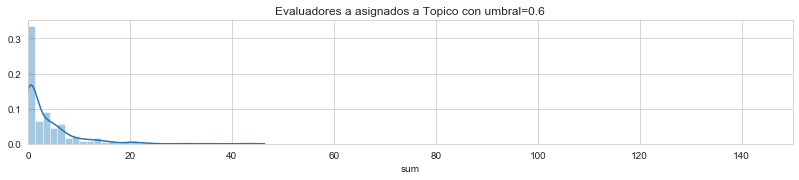

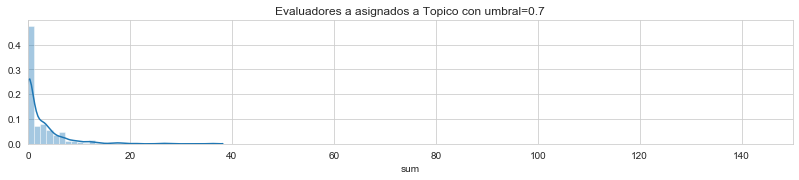

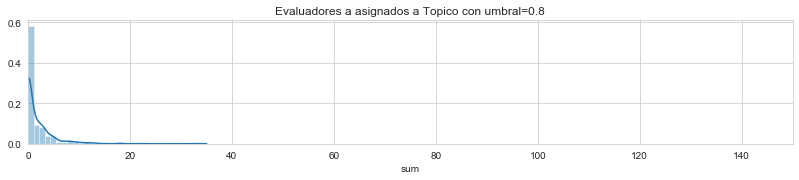

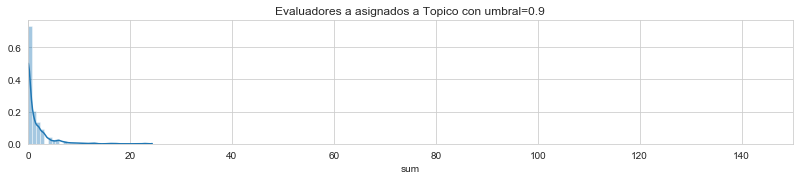

/Users/danielbustillos/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/danielbustillos/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


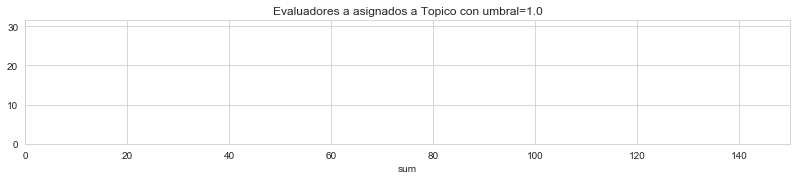

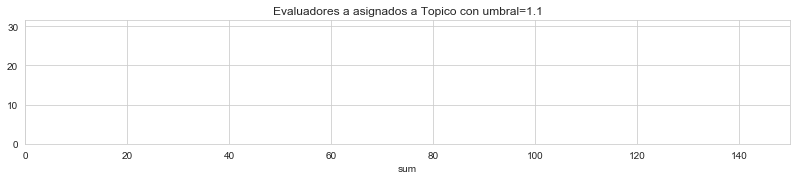

In [46]:
for file in range(len(orden_rows)):
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax = sns.distplot(orden_rows[file]["sum"],bins=30)
    sns.set_style("whitegrid")
    ax.set_title('Evaluadores a asignados a Topico con ' + orden_rows[file].reset_index()["umbral"][0])
    ax.set_xlim(0,150)
    plt.show()

## Análisis de topicos por evaluador

In [101]:
topics_eval = joblib.load('../../trained_models/archivos/topicos_por_evaluador.pkl')
topics_eval = topics_eval.iloc[:,0:]
topics_eval.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
CVU,,,,,,,,,,,,,,,,,,,,,
32,1.039730e-11,0.022571,0.024007,0.000000e+00,3.344736e-13,5.946791e-01,0.045747,0.007538,0.000234,0.082395,...,0.003466,0.000000e+00,0.015221,6.372822e-11,0.101933,0.000000,5.356554e-01,0.000000,0.000000e+00,0.000000e+00
62,3.316664e-06,0.033592,0.075867,2.268785e-15,1.231933e-13,2.130934e-05,0.070647,0.035292,0.009585,0.009715,...,0.015404,1.614905e-14,0.013444,2.346778e-11,0.025559,0.037891,3.676195e-02,0.000000,5.257031e-18,5.586499e-02
69,1.383044e-01,0.125887,0.115679,3.138819e-02,3.081193e-03,3.188412e-02,0.085819,0.042314,0.031455,0.046093,...,0.069906,6.562758e-02,0.102238,6.494592e-02,0.098280,0.045843,6.188742e-02,0.033367,9.932581e-02,6.823725e-01
92,1.095244e-05,0.039850,0.032008,0.000000e+00,7.967706e-17,1.572656e-08,0.037290,0.011857,0.045701,0.028163,...,0.031606,2.439729e-14,0.004882,0.000000e+00,0.020260,0.011168,1.085635e-01,0.000000,1.736001e-17,3.050502e-12
112,1.199364e-05,0.089996,0.024074,1.300955e-01,1.485544e-13,2.569760e-05,0.067111,0.008156,0.015631,0.015414,...,0.044469,4.672058e-14,0.024951,2.828788e-11,0.009978,0.119817,2.977220e-08,0.000000,2.744523e-01,3.340501e-12


### Distribución de pesos

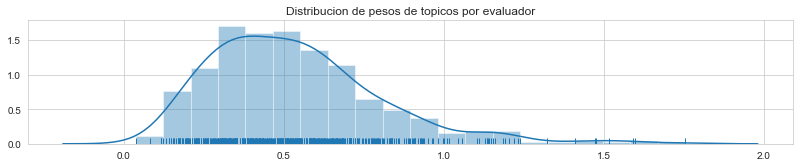

In [111]:
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.distplot(topics_eval.max(axis=0),bins=20,rug=True)

sns.set_style("whitegrid")
ax.set_title("Distribucion de pesos de topicos por evaluador" )
#ax.set_xlim(1,250)
#ax.set_ylim(0,40)
plt.show()

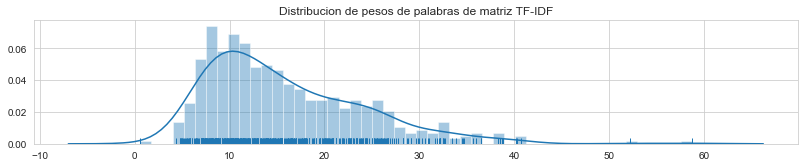

In [112]:
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.distplot(topics_eval.sum(axis=0),rug=True,bins=50)
sns.set_style("whitegrid")
ax.set_title("Distribucion de pesos de palabras de matriz TF-IDF" )
#ax.set_xlim(1,250)
#ax.set_ylim(0,40)
plt.show()

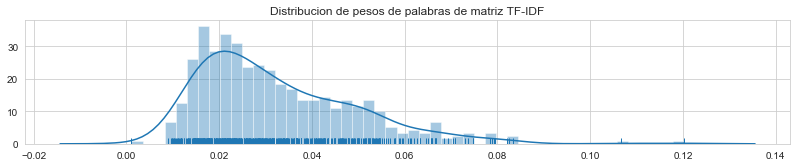

In [113]:
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.distplot(topics_eval.mean(axis=0),rug=True,bins=50)
sns.set_style("whitegrid")
ax.set_title("Distribucion de pesos de palabras de matriz TF-IDF" )
#ax.set_xlim(1,250)
#ax.set_ylim(0,40)
plt.show()

## Distribución de evaluadores

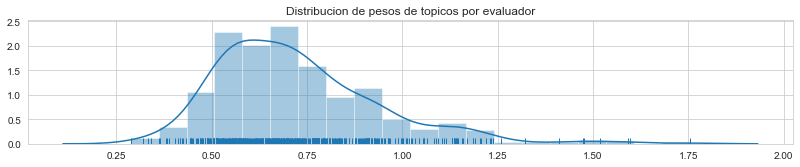

In [114]:
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.distplot(topics_eval.max(axis=1),bins=20,rug=True)

sns.set_style("whitegrid")
ax.set_title("Distribucion de pesos de topicos por evaluador" )
#ax.set_xlim(1,250)
#ax.set_ylim(0,40)
plt.show()

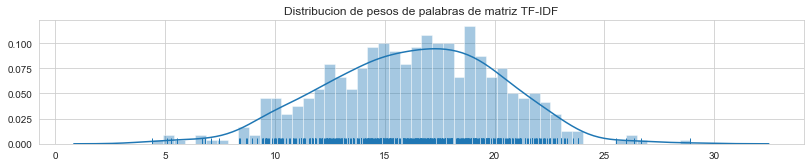

In [116]:
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.distplot(topics_eval.sum(axis=1),rug=True,bins=50)
sns.set_style("whitegrid")
ax.set_title("Distribucion de pesos de palabras de matriz TF-IDF" )
#ax.set_xlim(1,250)
#ax.set_ylim(0,40)
plt.show()

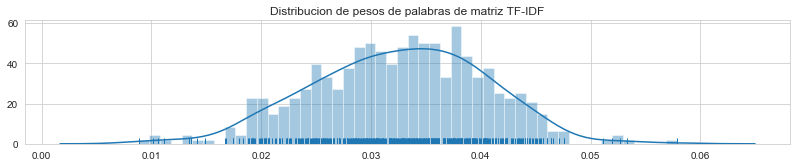

In [117]:
fig, ax = pyplot.subplots(figsize=a4_dims)

ax = sns.distplot(topics_eval.mean(axis=1),rug=True,bins=50)
sns.set_style("whitegrid")
ax.set_title("Distribucion de pesos de palabras de matriz TF-IDF" )
#ax.set_xlim(1,250)
#ax.set_ylim(0,40)
plt.show()